# 1. Data Wrangling

<b>Load Libraries</b>

In [32]:
# data structures
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
## settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

<b>Load Dataset</b>

In [33]:
# dataset
df_base = pd.read_excel('../dataset/data.xlsx', sheet_name='Year 2010-2011')

<b>Peek at Data</b>

In [34]:
# shape
df_base.shape

(541910, 8)

In [35]:
# head
df_base.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [36]:
# tail
df_base.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [37]:
# info
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<b>Format Adjustments</b>

In [38]:
# dtype columns separation
num_cols = df_base.select_dtypes(np.number).columns.tolist()
cat_cols = df_base.select_dtypes('object').columns.tolist()

In [39]:
# cloning
df_cleaned = df_base.copy()

In [40]:
# trimming white spaces
for name in cat_cols:
    df_cleaned[name] = df_base[name].astype(str).str.strip()

In [41]:
# null strings
mask = df_cleaned[cat_cols] == ''
counts = mask.sum(axis=0)
print(f'Total null strings per column: \n{counts}')

Total null strings per column: 
Invoice        0
StockCode      0
Description    0
Country        0
dtype: int64


In [42]:
# spelling
for name in cat_cols:
    print(f'{name}: {df_cleaned[name].unique()}')

Invoice: ['536365' '536366' '536368' ... '581585' '581586' '581587']
StockCode: ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Country: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [43]:
# low variance
low_variance = df_cleaned.nunique().to_frame('nunique')
low_variance['percentage(%)'] = (low_variance['nunique'] / len(df_cleaned)) * 100
low_variance

,nunique,percentage(%)
Invoice,25900,4.779391
StockCode,4070,0.751047
Description,4212,0.777251
Quantity,722,0.133232
InvoiceDate,23260,4.292226
Price,1630,0.300788
Customer ID,4372,0.806776
Country,38,0.007012


In [44]:
# dtypes conversion
df_cleaned[cat_cols] = df_cleaned[cat_cols].astype('category')

<b>Duplications</b>

In [45]:
# counts
mask = df_cleaned.duplicated()
counts = mask.sum()
print(f'Total duplications: {counts}')

## Conclusion: Those duplications may be errors because they have the same invoice which has to be unique. 
## Therefore,we'll choose to remove it.

Total duplications: 5268


In [46]:
# drop duplications
df_cleaned.drop_duplicates(inplace=True)

<b>Missing Values</b>

In [47]:
# counts
mask = df_cleaned.isnull()
counts = mask.sum()
print(f'Total missing values per columns: \n{counts}')

## Conclusion: Due to the need for later features creation, we'll remove those rows with null 'Customer ID'

Total missing values per columns: 
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135037
Country             0
dtype: int64


In [48]:
# drop
df_cleaned.dropna(axis=0, subset='Customer ID', inplace=True)

<b>Features Engineering</b>

In [49]:
# time format standardization
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'].dt.strftime('%Y-%m-%d'))

In [50]:
# drop unrelated-task features
try:
    df_cleaned.drop(['StockCode', 'Description'], axis=1, inplace=True)
except Exception as e:
    print(e)

In [51]:
# dtypes conversion 
df_cleaned['Customer ID'] = df_cleaned['Customer ID'].astype(int).astype('category')

In [52]:
# rename columns and reset index
names = ['invoice', 'quantity', 'invoice_date', 'price', 'customer_id', 'country']
df_cleaned.columns = names

try:
    df_cleaned.set_index('customer_id', inplace=True)
except Exception as e:
    print(e)

In [53]:
# time format standardization
df_cleaned['invoice_date'] = pd.to_datetime(df_cleaned['invoice_date'].dt.strftime('%Y-%m-%d'))

In [54]:
# drop invoices that are canceld
mask = ~df_cleaned['invoice'].str.startswith('C')
df_cleaned = df_cleaned.copy()[mask]

In [55]:
# 'frequency' column
freq = df_cleaned.groupby('customer_id', observed=True)['invoice'].count().to_frame('frequency').sort_index()

In [56]:
# 'monetary' column
## 'observed' parameter means that show values if it's in presence, use for 'groupby' with multiple columns as 'Grouper'
df_cleaned['total'] = df_cleaned['quantity'] * df_cleaned['price']
monetary = df_cleaned.groupby('customer_id', observed=True)['total'].sum().to_frame('monetary').sort_index()

In [57]:
# 'recency' column
mask = df_cleaned.groupby('customer_id', observed=True)['invoice_date'].rank(method='first', ascending=False) == 1
recency = (df_cleaned[mask]['invoice_date'] - min(df_cleaned[mask]['invoice_date'])).dt.days.to_frame('recency').sort_index()

In [58]:
# finalize and save df
df_rfm = pd.concat([recency, freq, monetary], ignore_index=False, axis=1)

## merging to add the 'country' column
df_to_be_merged = df_cleaned['country'].reset_index().drop_duplicates(subset='customer_id')
df_rfm = pd.merge(left=df_rfm, right=df_to_be_merged, left_index=True, right_on='customer_id').set_index('customer_id')

# saving to the separate file
df_rfm.to_csv('../dataset/rfm.csv')

# 2. Exploratory Data Analysis

<b>Load Libraries</b>

In [59]:
# zscore
from scipy.stats import zscore

# visualization
from statsmodels.api import qqplot

# normality test
from scipy.stats import normaltest, kstest

<b>Univariate Analysis</b>

In [60]:
# dtype columns separation
num_cols = df_rfm.select_dtypes(np.number).columns.tolist()
cat_cols = df_rfm.select_dtypes('object').columns.tolist()

In [30]:
# summarize statistics
df_rfm[num_cols].describe([0.01, 0.5, 0.99]).T

,count,mean,std,min,1%,50%,99%,max
recency,4339.0,280.958516,100.007757,0.0,4.380,323.00,372.0000,373.00
frequency,4339.0,90.512330,225.515289,1.0,1.000,41.00,655.6200,7676.00
monetary,4339.0,2048.220072,8984.247808,0.0,52.076,668.56,19780.2672,280206.02


In [31]:
# skewness
df_rfm[num_cols].skew()

recency      -1.246137
frequency    18.043625
monetary     19.341405
dtype: float64

In [32]:
# normality test
idx = pd.MultiIndex.from_product([['D\'Agostino and Pearson\'s test', 'Kolmogorov-Smirnov'], 
                                  ['Statistic', 'p-value']])

stats, pvalues = normaltest(df_rfm[num_cols].values, axis=0)
results = np.vstack([stats, pvalues])

stats, pvalues = kstest(df_rfm[num_cols].values, 'norm', axis=0)
results = np.vstack([results, stats, pvalues])

results = pd.DataFrame(results, index=idx, columns=num_cols)
results

## Conclusion: Those data do not come from normal distribution
## Next: We'll use 1th and 99th quantile to detect outliers

recency    frequency  \
D'Agostino and Pearson's test Statistic   7.316822e+02  9146.386447   
                              p-value    1.309861e-159     0.000000   
Kolmogorov-Smirnov            Statistic   9.905191e-01     0.969842   
                              p-value     0.000000e+00     0.000000   

                                            monetary  
D'Agostino and Pearson's test Statistic  9404.208710  
                              p-value       0.000000  
Kolmogorov-Smirnov            Statistic     0.999681  
                              p-value       0.000000

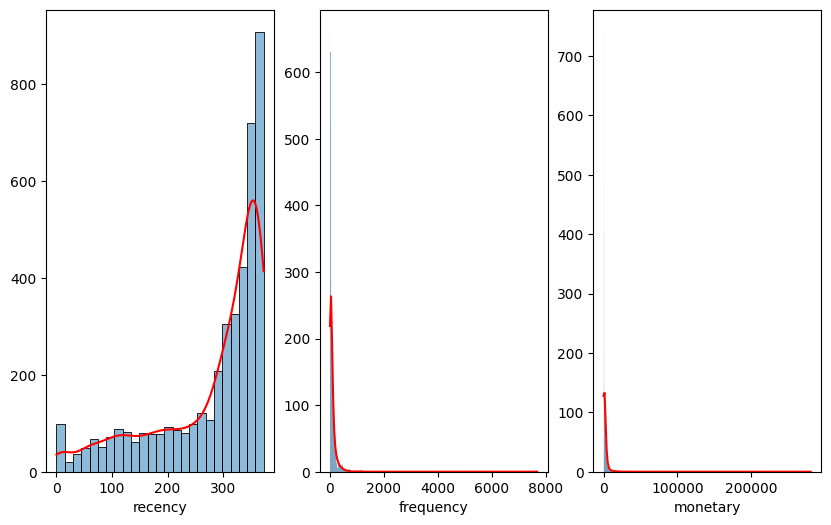

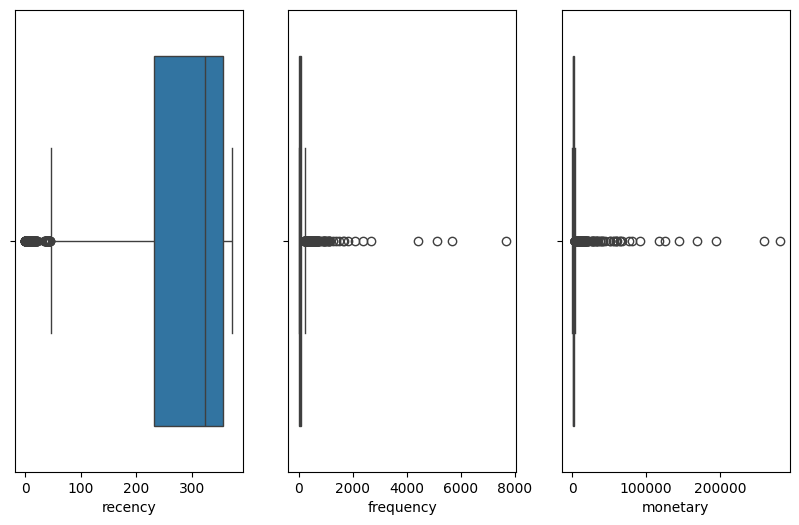

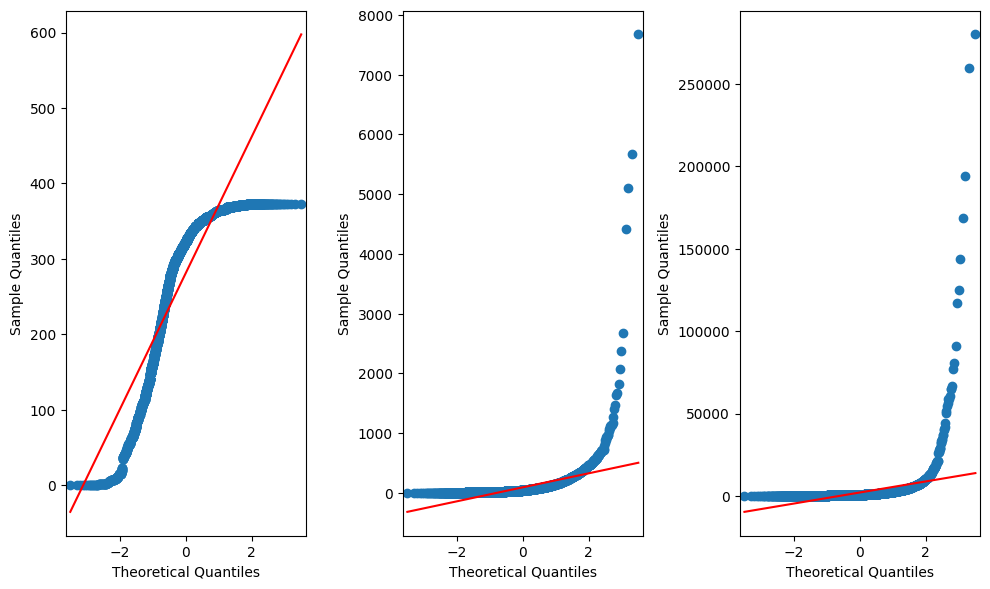

In [33]:
# hist + box + qq
fig, axes_hist = plt.subplots(1, 3, sharex=False, sharey=False)
fig, axes_box = plt.subplots(1, 3, sharex=False, sharey=False)
fig, axes_qq = plt.subplots(1, 3, sharex=False, sharey=False)
axes = dict(hist=axes_hist, box=axes_box, qq=axes_qq)

def plot_hist(i):
    g = sns.histplot(df_rfm[num_cols[i]], kde=True, ax=axes['hist'][i])
    g.axes.lines[0].set_color('r')
    g.set_ylabel(None)

def plot_box(i):
    g = sns.boxplot(df_rfm[num_cols[i]], orient='h', ax=axes['box'][i])

def plot_qq(i):
    g = qqplot(df_rfm[num_cols[i]], line='r', ax=axes['qq'][i])

for i in range(3):
    plot_hist(i)
    plot_box(i)
    plot_qq(i)

plt.tight_layout()
plt.show()

<b>Outliers</b>

In [30]:
# outliers detection
z_score = zscore(df_rfm[num_cols].values)
mask = np.all(np.abs(z_score) < 3, axis=1)
print(f'Total outliers: {len(df_rfm) - mask.sum()}')

## remove outliers
df_rfm = df_rfm[mask]
print(f'Remain: {len(df_rfm)}')

## saving files
filter_out_outliers = pd.DataFrame(z_score[mask, :], columns=num_cols)
filter_out_outliers['country'] = df_rfm['country'].values
filter_out_outliers.to_csv('../dataset/processed_outliers.csv', index=False)

# saving file
df_rfm.to_csv('../dataset/cleaned_rfm.csv')

Total outliers: 50
Remain: 4289


<b>Bivariate Analysis</b>

In [45]:
# correlation matrix
corr = df_rfm[num_cols].corr()
corr

,recency,frequency,monetary
recency,1.000000,0.349304,0.283207
frequency,0.349304,1.000000,0.608185
monetary,0.283207,0.608185,1.000000


In [46]:
# high correlations detection
triu_corr = np.triu(corr)
for i in range(3):
    for j in range(3):
        if (i != j) and (np.abs(triu_corr[i, j] > 0.5)):
            print(f'{num_cols[i]} ~ {num_cols[j]}: {triu_corr[i, j]}')

frequency ~ monetary: 0.608184760311464


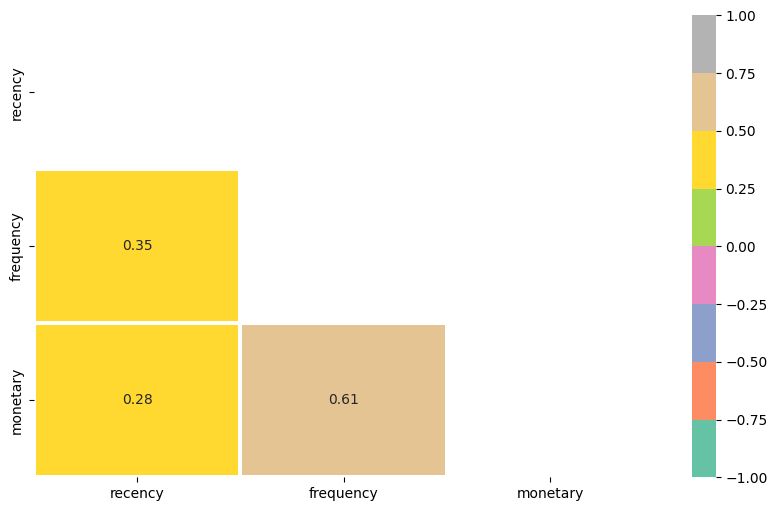

In [47]:
# heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='Set2', linewidths=1.5)
plt.show()

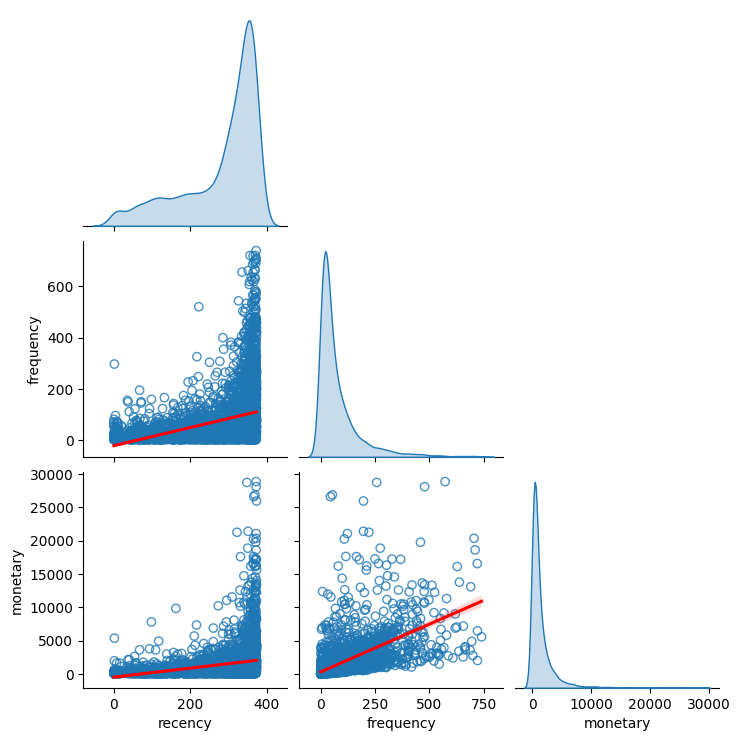

In [48]:
# pair plot
sns.pairplot(df_rfm[num_cols], corner=True, kind='reg', diag_kind='kde', 
             plot_kws=dict(scatter_kws=dict(facecolor='none'), 
                           line_kws=dict(color='r')))
plt.show()